## 鐵達尼號倖存分析

本綜合範例要讀取鐵達尼號倖存資料集 titanic.csv，，除了透過探索式分析認識數據外，也試著填補 Age、Fare、Embarked 的遺漏值 (缺失值)。

## 欄位說明
| 欄位名稱 | 說明 |
| -------- | ---- |
| PassengerId | 乘客編號 |
| Survived | 是否倖存，1表示倖存，0表示未倖存 |
| Pclass | 艙等，1表示一等艙，2表示二等艙，3表示三等艙 |
| Name | 乘客名稱 |
| Sex | 性別 |
| Age | 年齡 |
| SibSp | 兄弟姊妹及配偶的數量 |
| Parch | 父母及小孩的數量 |
| Ticket | 船票號碼 |
| Fare | 票價 |
| Cabin | 艙位號碼 |
| Embarked | 登船港口，C表示Cherbourg，Q表示Queenstown，S表示Southampton |

## 分析程序
1. 進行探索式分析來認識數據集。
2. 填補 Age、Fare、Embarke 的遺漏值 (缺失值)。

In [1]:
# 忽略警告訊息
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
'''
讓 matplotlib 可正確顯示中文字型
'''
import matplotlib
fm = matplotlib.font_manager.FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

# 如果系統中有微軟正黑體 (Microsoft JhengHei) 就用它 (Windows/Linux)
if 'Microsoft JhengHei' in mat_fonts:
    matplotlib.rc('font', family='Microsoft JhengHei')
    
# 如果系統中有黑體 (Heiti TC) 就用它 (macOS)
if 'Heiti TC' in mat_fonts:
    matplotlib.rc('font', family='Heiti TC')

In [3]:
# 載入數據
df = pd.read_csv("titanic.csv")

# 顯示資料筆數與欄位數
print(df.shape)

# 顯示前兩筆資料
df.head(2)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# 會發現 Age, Cabin, Embarked 有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 選擇 Sex, Survived 欄位，以 Sex 分組，計算平均存活率，取得小數第三位
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3)

,Sex,Survived
0,female,0.742
1,male,0.189


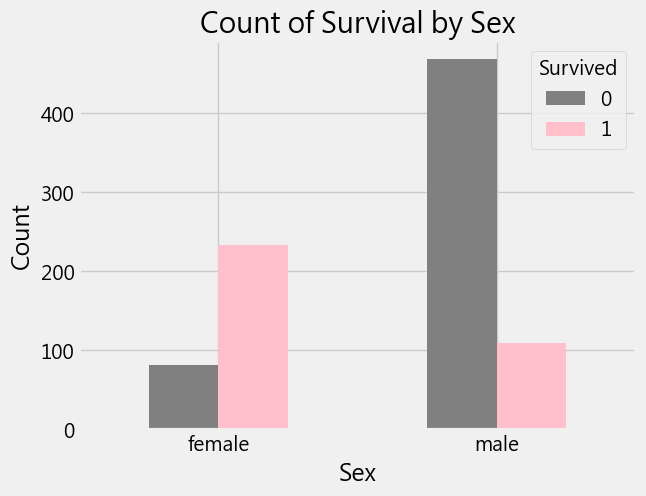

In [6]:
# 計算每個類別的計數
df_survived_count = df.groupby(['Sex', 'Survived']).size().unstack()

# 繪製長條圖 (stacked=True 表示堆疊長條圖, rot=0 表示 x 軸標籤不旋轉)
df_survived_count.plot(
    kind='bar', 
    stacked=False, 
    rot=0,
    color=['gray', 'pink'] # 可以用 16 進位色碼設定顏色，例如：['#E24A33', '#348ABD']
)

# 設定標題和座標軸標籤
plt.title('Count of Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# 顯示圖表
plt.show()

性別：大部的男性都罹難(僅剩約 19% 存活)，而女性則大部分都倖存(約 75%)

In [7]:
# 選擇 Pclass, Survived 欄位，以 Sex 分組，計算平均存活率，取得小數第三位
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3)

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


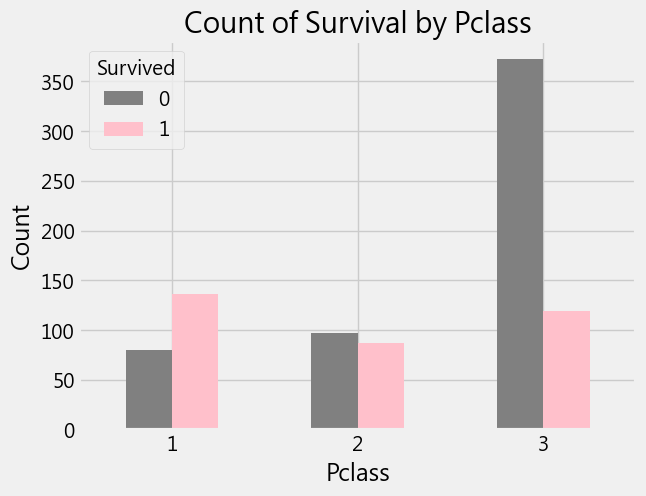

In [8]:
# 計算每個類別的計數
df_survived_count = df.groupby(['Pclass', 'Survived']).size().unstack()

# 繪製長條圖 (stacked=True 表示堆疊長條圖, rot=0 表示 x 軸標籤不旋轉)
df_survived_count.plot(
    kind='bar', 
    stacked=False, 
    rot=0, 
    color=['gray', 'pink']
)

# 設定標題和座標軸標籤
plt.title('Count of Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

# 顯示圖表
plt.show()

艙等：從數據中可發現頭等艙(Pclass=1)的乘客生存機率較高，
可能不論是逃生設備或是沈船訊息都最先傳到頭等艙

In [9]:
# 轉換性別資料：0->女性，1->男性
df['Sex_Code'] = df['Sex'].map({'female':1, 'male':0})
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


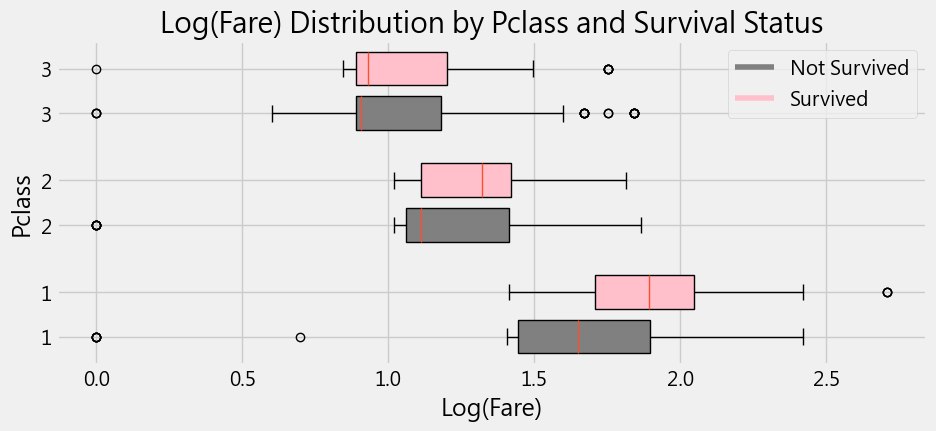

           Fare        
Survived      0       1
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517


In [10]:
# 由於票價分布非常廣，所以將票價取 log 後再畫圖
df['Log(Fare)'] = df['Fare'].map(lambda x: np.log10(x) if x > 0 else 0)

# 設定畫布大小
fig, ax = plt.subplots(figsize=(10, 4))

# 分成兩組：生存與否
survived_0 = df[df['Survived'] == 0]
survived_1 = df[df['Survived'] == 1]

# 繪製不同顏色的 boxplot，表示未生存
list_sv_2 = []
for pclass in sorted(df['Pclass'].unique()):
    list_sv_2.append(survived_0[survived_0['Pclass'] == pclass]['Log(Fare)'])
ax.boxplot(
    [survived_0[survived_0['Pclass'] == pclass]['Log(Fare)'] for pclass in sorted(df['Pclass'].unique())],
    positions=np.array(range(len(df['Pclass'].unique())))*2.0-0.4, 
    widths=0.6, 
    patch_artist=True,
    boxprops=dict(facecolor='gray'), 
    labels=sorted(df['Pclass'].unique()), 
    vert=False
)

# 繪製不同顏色的 boxplot，表示生存
list_sv_1 = []
for pclass in sorted(df['Pclass'].unique()):
    list_sv_1.append(survived_1[survived_1['Pclass'] == pclass]['Log(Fare)'])
ax.boxplot(
    list_sv_1,
    positions=np.array(range(len(df['Pclass'].unique())))*2.0+0.4, 
    widths=0.6, 
    patch_artist=True,
    boxprops=dict(facecolor='pink'), 
    labels=sorted(df['Pclass'].unique()), 
    vert=False
)

# 加入圖例
ax.legend(
    [
        plt.Line2D([0], [0], color='gray', lw=4),
        plt.Line2D([0], [0], color='pink', lw=4)
    ],
    ['Not Survived', 'Survived'], 
    loc='best'
)

# 設定標題和座標軸標籤
ax.set_title('Log(Fare) Distribution by Pclass and Survival Status')
ax.set_xlabel('Log(Fare)')
ax.set_ylabel('Pclass')

# 顯示圖表
plt.show()

# 顯示 pivot_table 結果
fare_median_pivot = pd.pivot_table(
    df, 
    values=['Fare'], 
    index=['Pclass'], 
    columns=['Survived'], 
    aggfunc='median'
).round(3)

print(fare_median_pivot)

每個 boxplot 中間的直線代表中位數（median）。在 boxplot 中：
- 中位數線：盒子中間的粗線代表數據的中位數，這是一個分布的中心趨勢指標。它顯示數據在這一範圍內的一個中間值，表示有一半的數據點位於該值之上，另一半位於該值之下。


除了中位數之外，boxplot 還包括其他幾個關鍵元素：
- 盒子的上下邊緣：代表第一四分位數（Q1，25%）和第三四分位數（Q3，75%），這個區間稱為四分位距（IQR）。這表示數據中間 50% 的數值範圍。
- 觸鬚（whiskers）：通常延伸到距離 Q1 和 Q3 1.5 倍 IQR 的範圍內，用來顯示數據範圍內的變動。超出觸鬚的數據點稱為異常值（outliers），用小圓點標出。
- 異常值（outliers）：這些是落在觸鬚範圍之外的數據點，通常用單獨的點來顯示。


這些元素共同幫助視覺化數據分布的集中趨勢、範圍及其異常值。

票價和艙等都是屬於彰顯乘客社會地位的一個特徵，買票價格較高的乘客，他們的生存機率也較高。

In [11]:
'''簡單補值'''

# 登船港口(Embarked)只有遺漏少數，直接補上出現次數最多的 S
df['Embarked'] = df['Embarked'].fillna('S')

# 費用(Fare)也只有遺漏一筆，因此就直接補上平均值
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Age 遺漏筆數： 177


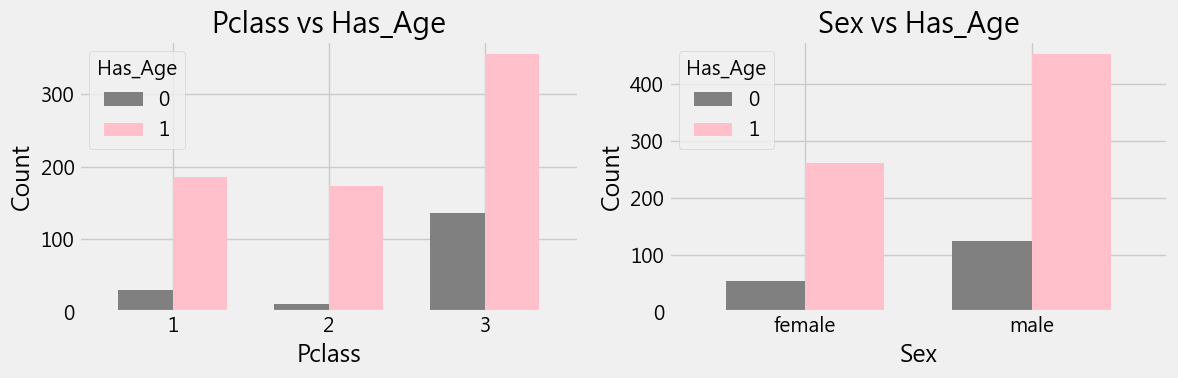

Sex      female  male  All
Has_Age                   
0            53   124  177
1           261   453  714
All         314   577  891


In [12]:
# 年紀(Age)的遺漏值較多，需好好思考如何填補
print('Age 遺漏筆數：', df['Age'].isnull().sum())

# 年紀(Age)的遺漏值處理
df['Has_Age'] = df['Age'].isnull().map(lambda x: 0 if x else 1)

# 設定畫布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 繪製 Pclass 與 Has_Age 的長條圖
pclass_age_counts = df.groupby(['Pclass', 'Has_Age']).size().unstack()
pclass_age_counts.plot(
    kind='bar', 
    stacked=False, 
    rot=0,
    ax=ax1, 
    color=['gray', 'pink'], 
    width=0.7
)

# 繪製 Sex 與 Has_Age 的長條圖
sex_age_counts = df.groupby(['Sex', 'Has_Age']).size().unstack()
sex_age_counts.plot(
    kind='bar', 
    stacked=False, 
    rot=0,
    ax=ax2, 
    color=['gray', 'pink'], 
    width=0.7
)

# 設定標題和軸標籤
ax1.set_title('Pclass vs Has_Age')
ax1.set_ylabel('Count')
ax1.set_xlabel('Pclass')

ax2.set_title('Sex vs Has_Age')
ax2.set_ylabel('Count')
ax2.set_xlabel('Sex')

# 調整圖例
ax1.legend(title='Has_Age', labels=['0', '1'])
ax2.legend(title='Has_Age', labels=['0', '1'])

# 顯示圖表
plt.tight_layout()
plt.show()

# 顯示交叉表格
crosstab_result = pd.crosstab(
    df['Has_Age'], 
    df['Sex'], 
    margins=True
).round(3)
print(crosstab_result)

- 左圖：年紀遺漏值大部分在3等艙，如果年紀是個重要特徵，則我們對3等艙的觀察就會失真。
 * 保守的作法是觀察1,2艙等中年紀對存活與否的影響
- 右圖：顯示了遺漏值對性別的分布，其中314位女性有53位缺失年齡(~16.9%)，577位男性有124位缺失年齡(~21.5%)，男性遺漏年紀的比例稍微多一點(~4.6%)。

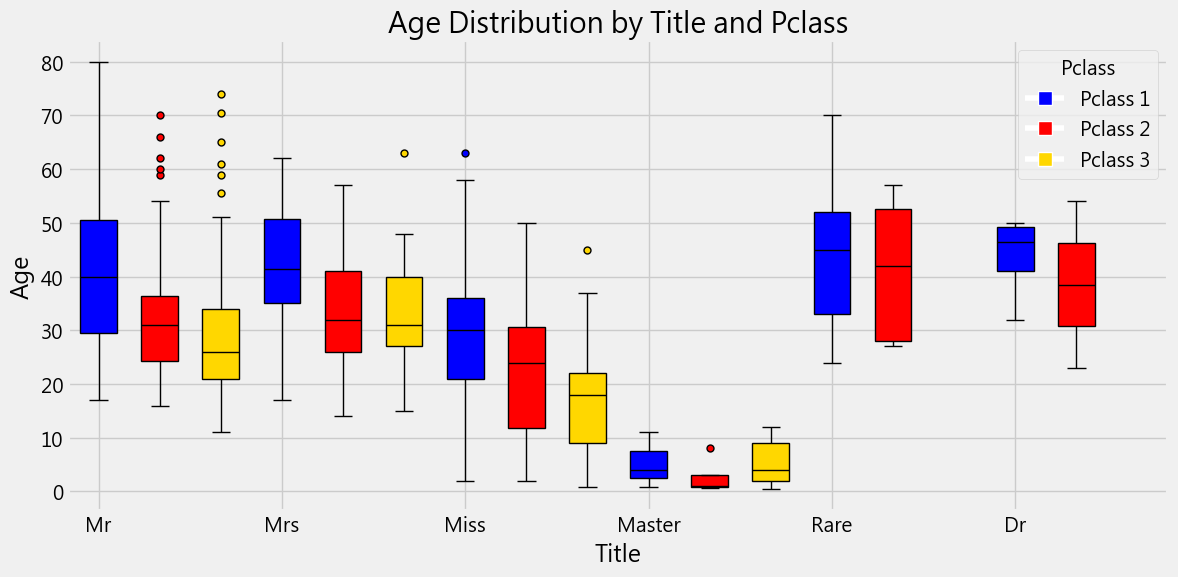

Title   Dr  Master  Miss  Mr  Mrs
Pclass                           
1        1       0     1  20    8
2        0       0     2   9    0
3        0       4    33  90    9


In [13]:
'''
填入遺漏值的方式打算使用姓名中同稱謂的平均值來填補
''' 

# 取出姓名當中的稱謂
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# 處理稀有稱謂和統一某些稱謂
title = df['Title'].value_counts().index
'''
Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Mlle', 'Major',
       'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer'],
      dtype='object', name='Title')
'''

# 前 5 名外的稱為稀有稱謂
rare = title[5:]

# 將稀有稱謂和統一某些稱謂
df['Title'] = df['Title'].map(lambda x: 'Rare' if x in rare else x)
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Lady'], 'Mrs')

# 設定畫布
fig, ax = plt.subplots(figsize=(12, 6))

# 設定顏色 (艙等 1->藍色, 2->紅色, 3->金色)
colors = {1: 'blue', 2: 'red', 3: 'gold'}

# 繪製不同 Pclass 的 boxplot，並使用不同顏色
for i, pclass in enumerate(sorted(df['Pclass'].unique()), 1):
    # 取出 Pclass 的子集
    subset = df[df['Pclass'] == pclass]

    # 設定 boxplot 的位置
    positions = np.array(range(len(df['Title'].unique()))) * 3 + i - 1
    
    # 繪製 boxplot
    list_subset = []
    for title in df['Title'].unique():
        list_subset.append(subset[subset['Title'] == title]['Age'].dropna())
    ax.boxplot(
        list_subset,
        positions=positions, 
        widths=0.6, 
        patch_artist=True, 
        boxprops=dict(facecolor=colors[pclass]), 
        medianprops=dict(color='black'),
        flierprops=dict(markerfacecolor=colors[pclass], 
        marker='o', 
        markersize=5, 
        linestyle='none')
    )

# 設定圖例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='w', markerfacecolor=colors[1], marker='s', markersize=10, label='Pclass 1'),
    Line2D([0], [0], color='w', markerfacecolor=colors[2], marker='s', markersize=10, label='Pclass 2'),
    Line2D([0], [0], color='w', markerfacecolor=colors[3], marker='s', markersize=10, label='Pclass 3')
]
ax.legend(handles=legend_elements, title="Pclass")

# 設定座標軸標籤
ax.set_xticks(np.arange(0, len(df['Title'].unique()) * 3, 3))
ax.set_xticklabels(df['Title'].unique())
ax.set_xlabel('Title')
ax.set_ylabel('Age')
ax.set_title('Age Distribution by Title and Pclass')

# 顯示圖表
plt.tight_layout()
plt.show()

# 找出年齡遺漏值的交叉表格
missing_mask = (df['Has_Age'] == 0)
crosstab_result = pd.crosstab(df[missing_mask]['Pclass'], df[missing_mask]['Title'])
print(crosstab_result)

In [14]:
# Title 被分成 6 組，分別是 Mr, Rare, Master, Miss, Mrs, Dr，各自提供不同代號 
# (讀取 df 後，只能執行一次，否則要重新讀 df)
df['Title'] = df['Title'].map({"Mr":0, "Rare":1, "Master":2, "Miss":3, "Mrs":4, "Dr":5})

# 以 Title 分組，計算 Age 的平均值的中位數
impute = df.groupby('Title')['Age'].mean().values

# 建立新欄位 Imp_Age，將遺漏值填入平均值
df['Imp_Age'] = df['Age']

# 將遺漏值填入平均值
for i in range(0, 6):
    df.loc[(df.Imp_Age.isnull()) & (df.Title == i), 'Imp_Age'] = impute[i]

# 將 Imp_Age 轉換為整數
df['Imp_Age'] = df['Imp_Age'].astype('int')

# 顯示填補遺漏值後的資料
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Log(Fare),Has_Age,Title,Imp_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.860338,1,0,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.852988,1,4,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.898999,1,3,26
